In [43]:
import json
eval_filename = 'KPGrouping10000.json'
with open(eval_filename) as f:
    data = json.load(f)
import os

In [44]:
from PIL import Image, ImageDraw

In [45]:
#filename = "fb2ebd179d2715f604e18d2aa0ed08f2_d3d3LnN0YXRpc3RpcXVlcy5kZXZlbG9wcGVtZW50LWR1cmFibGUuZ291di5mcgkzNy4yMzUuODkuMTA3.xls-0-0.png"
#filename = "fa8527e1883a153f7101c6882c7ba16e_d3d3LmhwYy5nby50aAkxMjIuMTU0LjczLjI2-2-0.png"
filename = "c4c0627d16eb05af88880a92faec6aaa_amFyY2hpdmVzLmNvbQkxOTIuMTg1Ljk4LjE5OA==-5-0.png"

In [46]:
thres = 0.4
img_dir = './'
im = Image.open(img_dir+filename)
draw = ImageDraw.Draw(im)
chart_type = None
if 'Group' in eval_filename:
    groups = data[filename][2]
    for group in groups:
        # 提取分组中的中心点坐标。
        cen_in_group = group[0:2]
        # 遍历分组中的关键点。
        for k in range(1, len(group[:-1])//2):
            key_in_group = group[2*k:2*k+2]
            draw.line([tuple(cen_in_group),tuple(key_in_group)], fill ="blue", width = 1)
if(len(data[filename][0]['1']) > 1):
    chart_type = "Bar"
    keys = data[filename][0]['1']
    cens = data[filename][1]['1']
    for bbox in keys:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
    for bbox in cens:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))
elif(len(data[filename][0]['3']) > 1):
    chart_type = "Pie"
    keys = data[filename][0]['3']
    cens = data[filename][1]['3']
    for bbox in keys:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
    for bbox in cens:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))
else:
    chart_type = "Line"
    keys = data[filename][0]['2']
    cens = data[filename][1]['2']
    for bbox in keys:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
    for bbox in cens:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))
thres = 0.1
for category in ['4', '5', '6', '7', '8']:
    keys = data[filename][0][category]
    cens = data[filename][1][category]
    for bbox in keys:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
    for bbox in cens:
        if bbox[0] > thres:
            draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))


In [47]:
chart_type

'Bar'

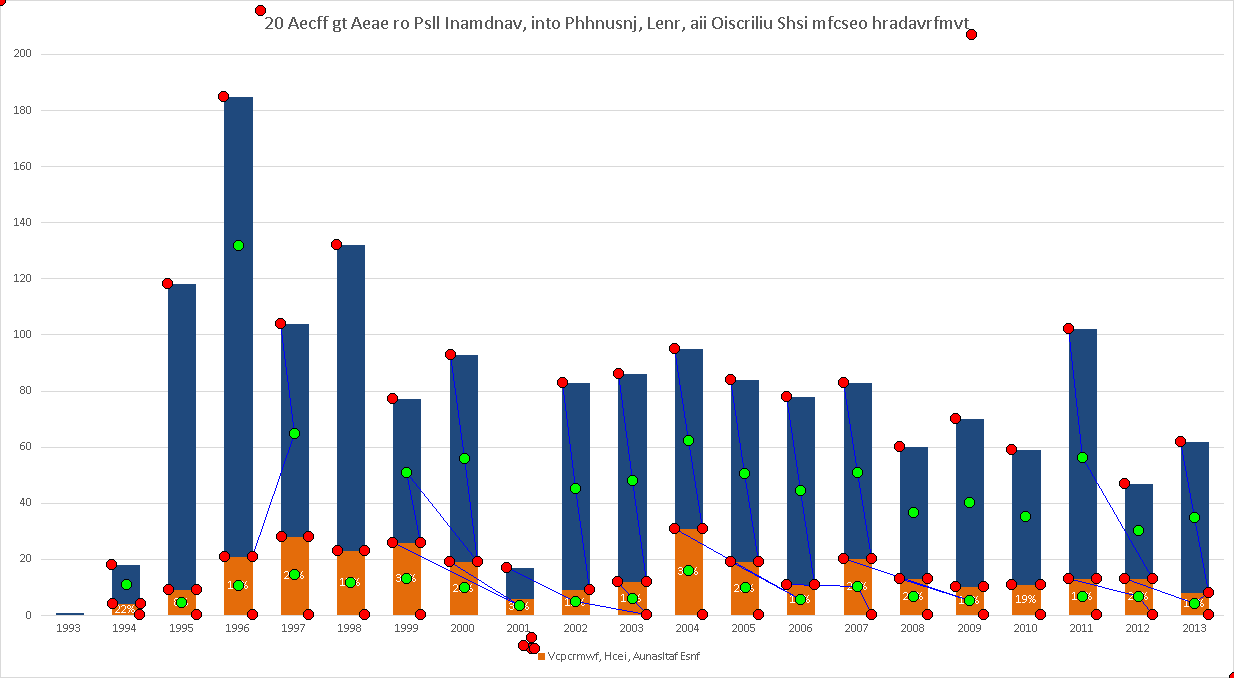

In [48]:
im